In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import re
from nltk.stem.porter import PorterStemmer
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
import string, time
string.punctuation
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
nltk.download('stopwords')
stop=stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
cv = CountVectorizer()
ps = PorterStemmer()

In [ ]:
data=pd.read_csv("Movie Reviews.csv")
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [ ]:
pos=data[data['label']==1]
print("Positive text \n",pos.head())
neg=data[data['label']==0]
print("Negative text \n",neg.head())

Positive text 
                                                  text  label
4   Im a die hard Dads Army fan and nothing will e...      1
6   Finally watched this shocking movie last night...      1
8   It may be the remake of 1987 Autumn's Tale aft...      1
9   My Super Ex Girlfriend turned out to be a plea...      1
10  I can't believe people are looking for a plot ...      1
Negative text 
                                                 text  label
0  I grew up (b. 1965) watching and loving the Th...      0
1  When I put this movie in my DVD player, and sa...      0
2  Why do people who do not know what a particula...      0
3  Even though I have great interest in Biblical ...      0
5  A terrible movie as everyone has said. What ma...      0


In [ ]:
data.shape

(40000, 2)

In [ ]:
len(pos)

19981

In [ ]:
len(neg)

20019

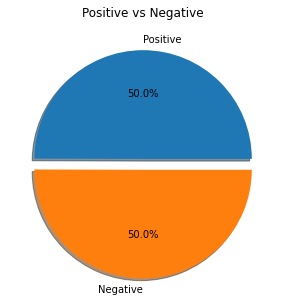

In [ ]:
fig=plt.figure(figsize=(5,5))
temp=[pos['label'].count(), neg['label'].count()]
plt.pie(temp,labels=['Positive' , 'Negative'],autopct='%0.1f%%',shadow=True,explode = (0, 0.1))
plt.title('Positive vs Negative')
plt.show()

In [ ]:
def preprocess (text):
  text=re.sub('<[^>]*>','',text)
  emoji=re.findall('(?::|;|=)(?:-)?(?:\)\(|D|P)',text)
  text=re.sub('[\W]+',' ',text.lower())+' '.join(emoji).replace('_','') 
  return text

In [ ]:
data['text']=data['text'].apply(preprocess)

In [ ]:
data.head()

,text,label
0,i grew up b 1965 watching and loving the thund...,0
1,when i put this movie in my dvd player and sat...,0
2,why do people who do not know what a particula...,0
3,even though i have great interest in biblical ...,0
4,im a die hard dads army fan and nothing will e...,1


In [ ]:
def tokenizer(text):
  return text.split()

In [ ]:
def tokenizer_porter(text):
   return [ps.stem(word) for word in text.split()]

In [ ]:
positive_data = data[ data['label'] == 1]
positive_data = positive_data['text']
negative_data = data[ data['label'] == 1]
negative_data = negative_data['text']

In [ ]:
from wordcloud import WordCloud

In [ ]:
def plot_wordcloud(data, color = 'white'):
  words=' '.join(data)
  clean_word=" ".join([word for word in words.split() if (word!='movie' and word!='film')])
  wordcloud=WordCloud(stopwords=stop, background_color=color, width=2500, height=2000).generate(clean_word)
  plt.figure(1, figsize=(10, 7))
  plt.imshow(wordcloud) 
  plt.axis("off")
  plt.show()

Positive words


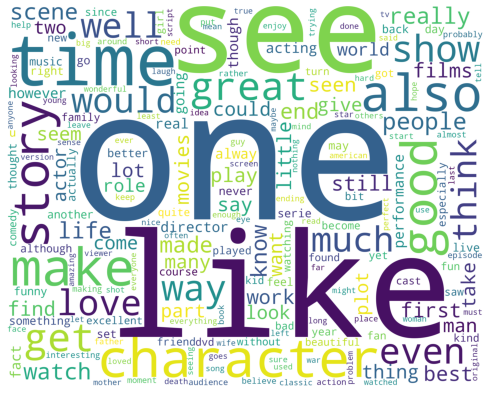

In [ ]:
print("Positive words")
plot_wordcloud(positive_data,'white')

Negative words


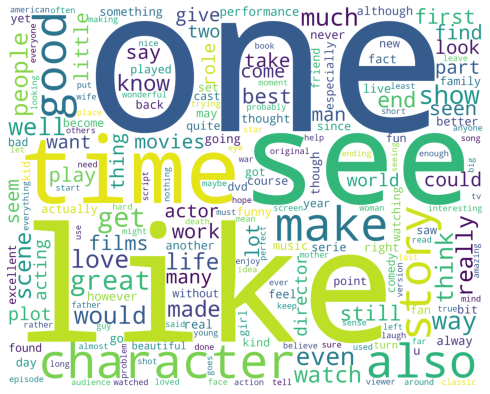

In [ ]:
print("Negative words")
plot_wordcloud(negative_data,'white')

In [ ]:
tfidf = TfidfVectorizer(lowercase=False, tokenizer=tokenizer_porter)
y=data.label.values
print(y)


[0 0 0 ... 0 1 1]


In [ ]:
X = tfidf.fit_transform(data.text)

In [ ]:
X.shape


(40000, 66565)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=2)


In [ ]:
from sklearn.linear_model import LogisticRegressionCV
model=LogisticRegressionCV(cv=6, scoring='accuracy', random_state=0,max_iter=500)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy of our model: " , accuracy_score(y_test,y_pred))

Accuracy of our model:  0.89325
